<a href="https://colab.research.google.com/github/KlippL/Doctors_Reviews_NLP/blob/master/Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Makes a Good Doctor ?

## Text Analysis of Doctor Reviews Using Fisher's Discriminant and LDA


Contributors: Sonal Agrawal, Jingyao Kang, Laura Klipp, Rahul Panicker

#### Background and Data Collection

We scraped online doctor's reviews from Ratemds.com and Healthgrades.com from various cities around the United States. We collected reviews for 6 specialties:
1. Family Doctors / General Practitioners
2. Internal Medicine
3. General Surgery
4. Cardiology
5. OBGYN
6. Pediatrics

In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np   
import nltk 
import string
import os
import gensim
from gensim import corpora
!pip install pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore")                                   #Ignoring unnecessory warnings

import matplotlib.pyplot as pyplot
from wordcloud import WordCloud
from nltk.corpus import stopwords                                   #Stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer                                 # Stemmer
from nltk.stem import WordNetLemmatizer                             # Lemmatizer
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

     |████████████████████████████████| 1.6MB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Data Sets

* Import all scrapes from each specialty and combine them 
* Only keep the star rating from the review and the review
* Subset the data only for the good reviews (4 stars and above) and the bad reviews (3 stars and below)
* Make a dummy column of the good and bad reviews
* Make two new df of good and bad reviews

In [0]:
# Cardiologists
dfCard1 = pd.read_csv("https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Hou.csv", index_col =0)
dfCard2 = pd.read_csv("https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_LA.csv", index_col =0)
dfCard3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Atl.csv', index_col =0)
dfCard4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Sea.csv', index_col =0)
dfCard5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Det.csv', index_col =0)
dfCard6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Cardiologist_Hou.csv', sep = '\t')

# Family General Practitioners
dfGP1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Atl.csv', index_col =0)
dfGP2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Hou.csv', index_col =0)
dfGP3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_LA.csv', index_col =0)
dfGP4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Sea.csv', index_col =0)
dfGP5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Det.csv', index_col =0)
dfGP6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Family_GP_Hou.csv', sep = '\t')

# Internal Medicine
dfInt1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Atl.csv', index_col =0)
dfInt2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Hou.csv', index_col =0)
dfInt3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_LA.csv', index_col =0)
dfInt4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Sea.csv', index_col =0)
dfInt5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Det.csv', index_col =0)
dfInt6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Intern_Hou.csv', sep = '\t')

# Pediatrics
dfPed1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Atl.csv', index_col =0)
dfPed2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Hou.csv', index_col =0)
dfPed3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_LA.csv', index_col =0)
dfPed4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Sea.csv', index_col =0)
dfPed5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Det.csv', index_col =0)
dfPed6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Ped_Hou.csv', sep = '\t')

# General Surgery
dfSurg1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Atl.csv', index_col =0)
dfSurg2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Hou.csv', index_col =0)
dfSurg3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_LA.csv', index_col =0)
dfSurg4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Sea.csv', index_col =0)
dfSurg5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Det.csv', index_col =0)
dfSurg6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Surgery_Hou.csv', sep = '\t')

# OBGYN
dfOB1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Atl.csv', index_col =0)
dfOB2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Hou.csv', index_col =0)
dfOB3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_LA.csv', index_col =0)
dfOB4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Sea.csv', index_col =0)
dfOB5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Det.csv', index_col =0)
dfOB6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_OBGYN_Hou.csv', sep = '\t')

In [3]:
df_cardio = pd.concat([dfCard1, dfCard2, dfCard3, dfCard4, dfCard5, dfCard6],ignore_index=True, sort=True)
df_gp = pd.concat([dfGP1, dfGP2, dfGP3, dfGP4, dfGP5, dfGP6],ignore_index=True, sort=True)
df_intern = pd.concat([dfInt1, dfInt2, dfInt3, dfInt4, dfInt5, dfInt6],ignore_index=True, sort=True)
df_ped = pd.concat([dfPed1, dfPed2, dfPed3, dfPed4, dfPed5, dfPed6],ignore_index=True, sort=True)
df_surg = pd.concat([dfSurg1, dfSurg2, dfSurg3, dfSurg4, dfSurg5, dfSurg6],ignore_index=True, sort=True)
df_ob = pd.concat([dfOB1, dfOB2, dfOB3, dfOB4, dfOB5, dfOB6],ignore_index=True, sort=True)

df_all = pd.concat([df_cardio, df_gp, df_intern, df_ped, df_surg, df_ob], ignore_index=True, sort=True)

df_all = df_all[df_all.review.notnull()]
df_all = df_all[df_all.review != "None"]

print (len(df_all))

df_all.head()

17635


,Unnamed: 0,city,doctor_name,gender,helpfullness_rating,helpfulness_rating,individual_rating,knowledge_rating,overall_rating,review,review_count,review_date,scheduling_rating,specialty,staff_rating,state,wait_time,wait_time_rating
0,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,I was assigned Dr Attar in the Methodist ER. H...,21,2017-12-15T00:55:45.983Z,NaN,cardiologist,5,Texas,NaN,5.0
1,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,His kindness and caring gave me the sense that...,21,2016-08-30T05:07:29.955Z,NaN,Cardiologist,5,Texas,NaN,5.0
2,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,He was my cardiologist when I used to live in ...,21,2016-06-19T09:41:34.719Z,NaN,Cardiologist,5,Texas,NaN,5.0
3,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,"Dr.Attar is the best Dr anywhere, i love him t...",21,2016-03-30T02:20:23.272Z,NaN,Cardiologist,5,Texas,NaN,5.0
4,NaN,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,The doctor who was sent to us from god. He is ...,21,2014-09-10T00:46:59.381Z,NaN,Cardiologist,5,Texas,NaN,5.0


In [4]:
# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_all = df_all[['individual_rating', 'review']]
df_all.individual_rating = df_all.individual_rating.astype(float)
df_all = df_all[(df_all.individual_rating >= 4) | (df_all.individual_rating < 3)]

# Make a separate df of good reviews and bad reviews
df_good = df_all[(df_all.individual_rating >= 4)]
df_bad = df_all[(df_all.individual_rating < 3)]

# Make a dummy column in df_all for if a review is good or bad
df_all['is_good'] = (df_all.individual_rating >= 4) * 1 + (df_all.individual_rating < 3) * 0

print("Number of good reviews: ")  
(df_all['is_good'] == 1).sum()
print(' ')
print(" Number of bad reviews:") 
(df_all['is_good'] == 0).sum()

Number of good reviews: 


12135

 
 Number of bad reviews:


4526

In [5]:
random_sub = df_all.sample(n=12500)
random_sub.head()

print("Number of good reviews: ")  
(random_sub['is_good'] == 1).sum()
print(' ')
print(" Number of bad reviews:") 
(random_sub['is_good'] == 0).sum()

,individual_rating,review,is_good
15033,1.8,She's very cocky. Stated I didn't have a disea...,0
13567,5.0,Personalized care and attention. Genuinely com...,1
13724,4.8,Dr. Albee truly is a physician that takes out ...,1
4083,5.0,So Hot...........................................,1
3162,5.0,"Very helpful doctor, great attitude. Thank you.",1


Number of good reviews: 


9118

 
 Number of bad reviews:


3382

### Define Cleaning Functions

In [0]:
# Remove Punctuation
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c,"")
    return s

def removePunc(text_array):
    nopunc = []
    for h in text_array:
        try:
            nopunc.append(removePuncStr(h))
        except:
            nopunc.append(h)
    return nopunc

# Remove Numbers
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    nonum = []
    for n in text_array:
        try:
            nonum.append(removeNumbersStr(n))
        except:
            nonum.append(i)
    return nonum

# Remove Stopwords
def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        try:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                if w not in stop_words:
                    h2 = h2 + ' ' + w
            stopped_text.append(h2)
        except:
            stopped_text.append(h)
    return stopped_text


# Lemmentization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

def lemmText(text_array):
    WNlemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for h in text_array:
        try:
            words = word_tokenize(h) 
            h2 = ''
            for w in words:
                h2 = h2 + ' ' + WNlemmatizer.lemmatize(w,pos="v")
            lemmatized_text.append(h2)
        except:
            lemmatized_text.append(h)
    return lemmatized_text

# Removing other words that don't impact reviews
def stopOther(text_array):
    stop_words = set(['as','dr', 'doctor', 'doctors', 'he_is', 'said', 'told', 'did_not', 'another', 'didnt', \
                      'and_then', 'to_be','would', 'get', 'go', 'even', 'takes', 'at_all', 'doesnt', 'is_not', \
                      'about_it', 'about', 'across', 'act', 'acts', 'two', 'back', 'dont', 'patient', 'office', \
                      'of_the', 'in_the', 'one', 'also', 'have_been', 'always', 'he_has', 'like', 'see', 'and_his', \
                      'of_my', 'one_of', 'is_the', 'going', 'first', 'is_very', 'anyone', 'could', 'really', 'him_to'\
                      'to_the', 'and_he', 'has_been', 'in_his', 'to_see', 'went', 'for_the', 'in_my', 'she_is', \
                      'if_you', 'way', 'many', 'hes', 'since', 'to_me', 'and_the', 'that_he', 'is_an', 'me_and', \
                      'ive', 'say', 'man', 'him_and', 'with_my', 'to_him', 'of_his', 'and_was', 'on_the', 'with_the', \
                      'with_me', 'with_his', 'second', 'much', 'of_dr', 'im', 'to_have', 'and_my', 'at_the', 'as_well', \
                      'done', 'for_my', 'to_my', 'was_very', 'the_doctor', 'me_to', 'and_very', 'it_is', 'and_have', \
                      'ago', 'to_get', 'houston', 'sure', 'you_are', 'the_most', 'for_his', 'to_dr', 'and_has', \
                      'would_not', 'saw', 'doctor_he', 'it_was', 'had_to', 'is_one', 'going_to', 'for_over', 'that_was', \
                      'thorough_and', 'us', 'able_to', 'out_of', 'he_says', 'will', 'he_was', 'ever', 'him_to', \
                      'to_the', 'make', 'took', 'made', 'he_is_very', 'care_of', 'with_dr', 'things', 'go_to', 'came', \
                      'without', 'see_him', 'been_my', 'every', 'about_his', 'is_one_of', 'to_his', 'put', 'to_make', \
                      'for_me', 'have_to', 'may', 'all_of', 'and_is', 'with_him', 'would_have', 'to_take', 'to_you', \
                      'he_is_the', 'does_not', 'with_you', 'he_did', 'him_for', 'all_the', 'have_had', 'his_time', \
                      'you_have', 'want', 'what_is', 'seems', 'doctor_is', 'and_they', 'lot', 'to_go', 'went_to', \
                      'not_be', 'from_the', 'was_in', 'to_do', 'three', 'but_he', 'one_of_the', 'several', 'for_him', \
                      'and_takes', 'takes_the', 'is_one_of_the', 'he_will', 'actually', 'not_only', 'she_was', \
                      'he_takes', 'md', 'he_is_more', 'who_is', 'was_not', 'he_should', 'he_sent', 'he_was_more', \
                      'health_the', 'heard_of', 'he_was_so', 'he_was_our', 'he_was_on', 'he_put_in', 'he_is_now', \
                      'he_is_part', 'he_is_really', 'he_is_just', 'he_is_in', 'he_only', 'he_not_only', 'he_needed_to', \
                      'he_may', 'he_just', 'he_knew_the', 'he_worked', 'he_works', 'he_wrote', 'head_now', \
                      'he_is_one_the', 'he_is_now_my', 'he_is_in_this', 'he_is_able_to', 'he_is_able_to_do', \
                      'he_is_able', 'he_is_doing_and', 'he_needed', 'he_only_has', 'year', 'years', 'got', 'to_this',\
                      'do_not', 'and_had', 'me_that', 'this_is', 'at_me', 'of_this', 'the_is', 'to_come', 'wont', \
                      'this_was', 'she_had', 'to_to', 'that_had', 'then_she', 'in_for', 'me_for', 'is_of', 'for_an', \
                      'and_when', 'with_this', 'she_is_very', 'because_of', 'am_not', 'and_did_not', 'she_and_her', \
                      'this_and', 'him_again_and', 'her_very', 'take_those', 'on_all', 'them_not', 'at_the_same',\
                      'you_from', 'you_out_of', 'and_sometimes', 'when_he_was', 'that_in', 'but_we', 'with_our', \
                      'each_other', 'for_in', 'and_he_is_the', 'he_give', 'and_over', 'only_is', 'when_there', \
                      'have_in', 'have_he', 'that_have_been', 'has_an', 'there_he', 'but_what', 'who_have', 'yr', \
                      'there_is', 'out_of_his', 'him_when', 'in_addition', 'and_he_was', 'before_he', 'no_matter', \
                      'her_with', 'be_my', 'he_is_doing', 'tx', 'for_yrs', 'can_be', 'any_other', 'with_your', \
                      'rest_of', 'know_he', 'that_know', 'with_any', 'few_and',  'me_and_was', 'did_my', 'but_she_is', \
                      'think_the', 'and_know', 'they_take', 'yrs_and', 'for_their', 'for_being', 'with_her', 'she_has', \
                      'medical', 'never', 'pysician', 'now', 'day', 'seen', 'cardiologist', 'need', 'tell', 'work', \
                      'patients', 'to_how', 'lots', 'what_should', 'and_not', 'you_to', 'on_my', 'was_the', 'she_did',\
                      'that_the', 'had_no', 'to_her', 'and_she', 'shes', 'her_to', 'and_her', 'that_she', 'they_are', 'her_she', \
                      'not_to', 'and_that', 'for_and', 'in_her', 'more_than', 'her_for', "\'"
                     ])
    stopped_text = []
    for h in text_array:
        try:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                if w not in stop_words:
                    h2 = h2 + ' ' + w
            stopped_text.append(h2)
        except:
            stopped_text.append(h)
    return stopped_text

### Find differences in words that are used in good and bad reviews

Generating word clouds for total reviews, good reviews, and bad reviews shows differences in....

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

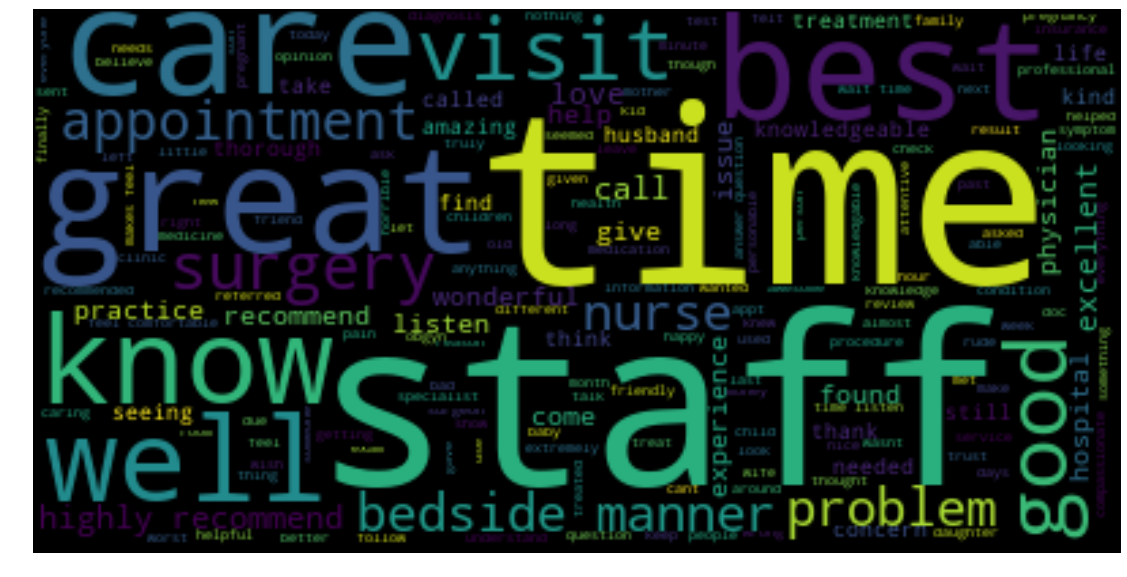

In [7]:
# Clean all reviews 
reviews_all = df_all.review.str.lower()
reviews_all = removePunc(reviews_all)
reviews_all = removeNumbers(reviews_all)
reviews_all = stopOther(reviews_all)


# Word Cloud for all reviews
wordcloud = WordCloud().generate(pd.Series(reviews_all).str.cat(sep = " "))

pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

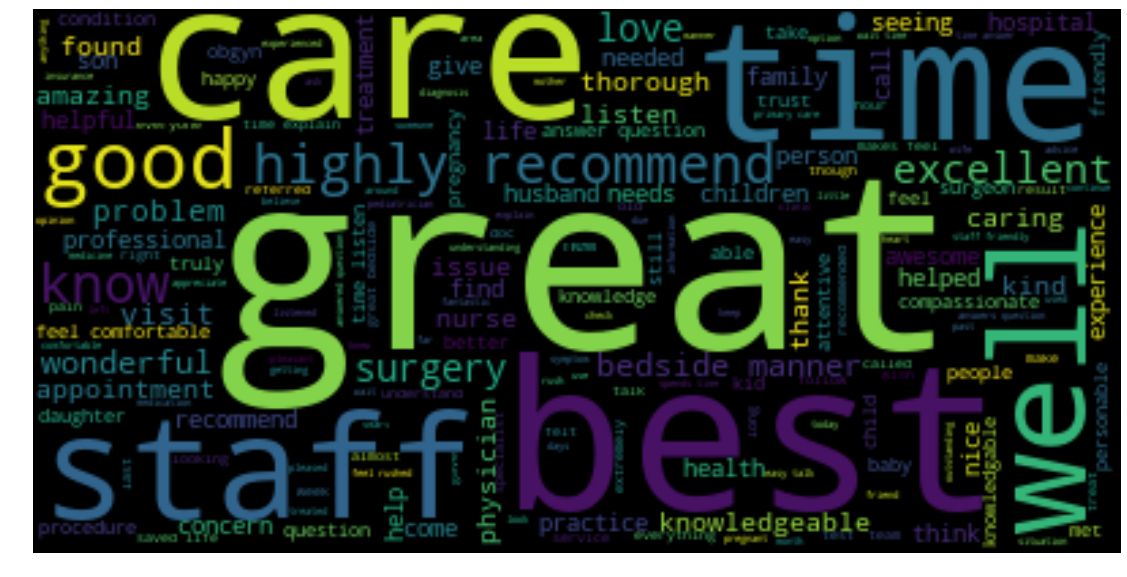

In [39]:
# Clean good reviews
reviews_good = df_good.review.str.lower()
reviews_good = removePunc(reviews_good)
reviews_good = removeNumbers(reviews_good)
reviews_good = stopOther(reviews_good)
wordcloud = WordCloud().generate(pd.Series(reviews_good).str.cat(sep = " "))

# Word Cloud for good reviews
pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

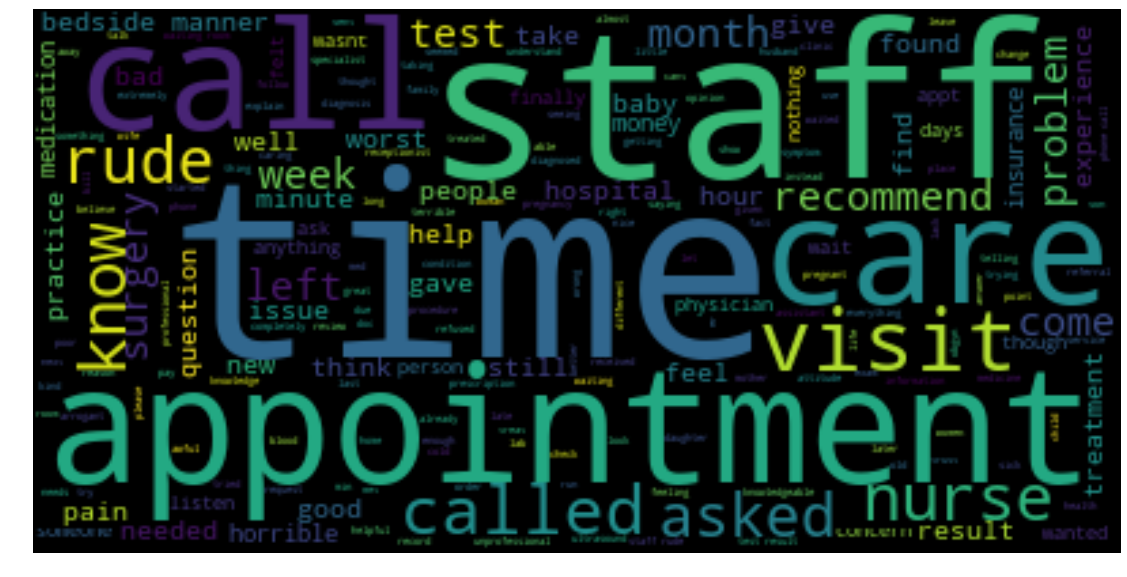

In [9]:
# Clean bad reviews
reviews_bad = df_bad.review.str.lower()
reviews_bad = removePunc(reviews_bad)
reviews_bad = removeNumbers(reviews_bad)
reviews_bad = stopOther(reviews_bad)

# Word Cloud for bad reviews
wordcloud = WordCloud().generate(pd.Series(reviews_bad).str.cat(sep = " "))

pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

## Text Analysis

In [0]:
reviews_sub = random_sub.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X = vec.fit_transform(reviews_sub)

In [11]:
dtm = pd.DataFrame(X.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm = dtm.T
print(tdm.shape)

(18450, 12500)


### Calculate Fisher's Discriminant Score

In [12]:
len(dtm)

12500

In [13]:
mask = pd.DataFrame(random_sub.is_good)
good_df = dtm.iloc[np.any(mask.values,axis=1),]
bad_df = dtm.iloc[~np.any(mask.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df) + len(good_df))/len(dtm)

1.0

In [14]:
FiDi = pd.DataFrame(((good_df.mean() - bad_df.mean())**2)/(np.std(good_df)**2 + np.std(bad_df)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words = FiDi.term.tolist()
words = stopText(words)
words = stopOther(words)

words = pd.Series(words).str.lstrip(" ").tolist()

FiDi = FiDi[FiDi.term.isin(words)].sort_values(by = 'FiDi_score', ascending = False)
FiDi.head(25)

,term,FiDi_score
12585,rude,1.710695e-01
2495,best,1.315476e-01
14387,the_best,1.278159e-01
5995,great,1.237376e-01
3079,caring,1.011303e-01
7268,highly,9.680383e-02
4798,excellent,9.572185e-02
18004,worst,9.172629e-02
8799,knowledgeable,8.047986e-02
15094,this_doctor,7.858269e-02


### Create DF of most Frequent Words

In [15]:
tdm['total'] = tdm.sum(axis =1)
freq = tdm.reset_index().rename(columns = {"level_0":"allwords"})

words2 = freq.allwords.tolist()
words2 = stopText(words2)
words2 = stopOther(words2)

words2 = pd.Series(words2).str.lstrip(" ").tolist()

freq = freq[freq.allwords.isin(words2)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq.head(25)

,allwords,total
15274,time,3920
13652,staff,3185
5995,great,2404
2977,care,2304
12270,recommend,2069
2495,best,2014
14387,the_best,1571
5928,good,1559
3079,caring,1507
12109,questions,1462


### Most frequent phrases

In [16]:
freq['under_count'] = freq.allwords.str.count('_')
freq[freq.under_count>=3].head(25)

,allwords,total,under_count
14028,takes_the_time_to,224,3
11177,one_of_the_best,184,3
6753,he_is_the_best,160,3
8377,is_the_best_doctor,145,3
6401,have_been_patient_of,138,3
2387,been_patient_of_dr,135,3
6388,have_been_going_to,131,3
12300,recommend_him_to_anyone,128,3
12285,recommend_her_to_anyone,126,3
16127,took_the_time_to,124,3


## Topic Analysis Using LDA

### Topic Analysis for Overall Reviews

In [0]:
# Topic Analysis for all reviews
rvws_all = stopText(reviews_all)
clean_rvws_all = [i.split() for i in rvws_all]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_all = corpora.Dictionary(clean_rvws_all)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_all = [dictionary_all.doc2bow(doc) for doc in clean_rvws_all]

In [32]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_all = Lda(doc_term_matrix_all, num_topics=5, id2word = dictionary_all, passes=50)

#Results
print(ldamodel_all.print_topics(num_topics=5, num_words=7))

[(0, '0.040*"surgery" + 0.020*"life" + 0.011*"hospital" + 0.010*"surgeon" + 0.008*"felt" + 0.007*"saved" + 0.006*"visit"'), (1, '0.024*"time" + 0.016*"care" + 0.013*"questions" + 0.013*"recommend" + 0.012*"professional" + 0.011*"knowledgeable" + 0.010*"excellent"'), (2, '0.013*"baby" + 0.011*"hospital" + 0.008*"pregnancy" + 0.008*"weeks" + 0.007*"pain" + 0.006*"blood" + 0.005*"birth"'), (3, '0.016*"time" + 0.013*"staff" + 0.010*"appointment" + 0.008*"wait" + 0.008*"call" + 0.007*"rude" + 0.007*"know"'), (4, '0.028*"great" + 0.022*"best" + 0.020*"staff" + 0.016*"recommend" + 0.015*"time" + 0.014*"wonderful" + 0.013*"feel"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'surgery'),
 Text(0, 0, 'life'),
 Text(0, 0, 'hospital'),
 Text(0, 0, 'surgeon'),
 Text(0, 0, 'felt'),
 Text(0, 0, 'saved'),
 Text(0, 0, 'visit'),
 Text(0, 0, 'family'),
 Text(0, 0, 'performed'),
 Text(0, 0, 'cancer')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'time'),
 Text(0, 0, 'care'),
 Text(0, 0, 'questions'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'professional'),
 Text(0, 0, 'knowledgeable'),
 Text(0, 0, 'excellent'),
 Text(0, 0, 'health'),
 Text(0, 0, 'highly'),
 Text(0, 0, 'caring')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'baby'),
 Text(0, 0, 'hospital'),
 Text(0, 0, 'pregnancy'),
 Text(0, 0, 'weeks'),
 Text(0, 0, 'pain'),
 Text(0, 0, 'blood'),
 Text(0, 0, 'birth'),
 Text(0, 0, 'months'),
 Text(0, 0, 'high'),
 Text(0, 0, 'pregnant')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'time'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'appointment'),
 Text(0, 0, 'wait'),
 Text(0, 0, 'call'),
 Text(0, 0, 'rude'),
 Text(0, 0, 'know'),
 Text(0, 0, 'room'),
 Text(0, 0, 'called'),
 Text(0, 0, 'care')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

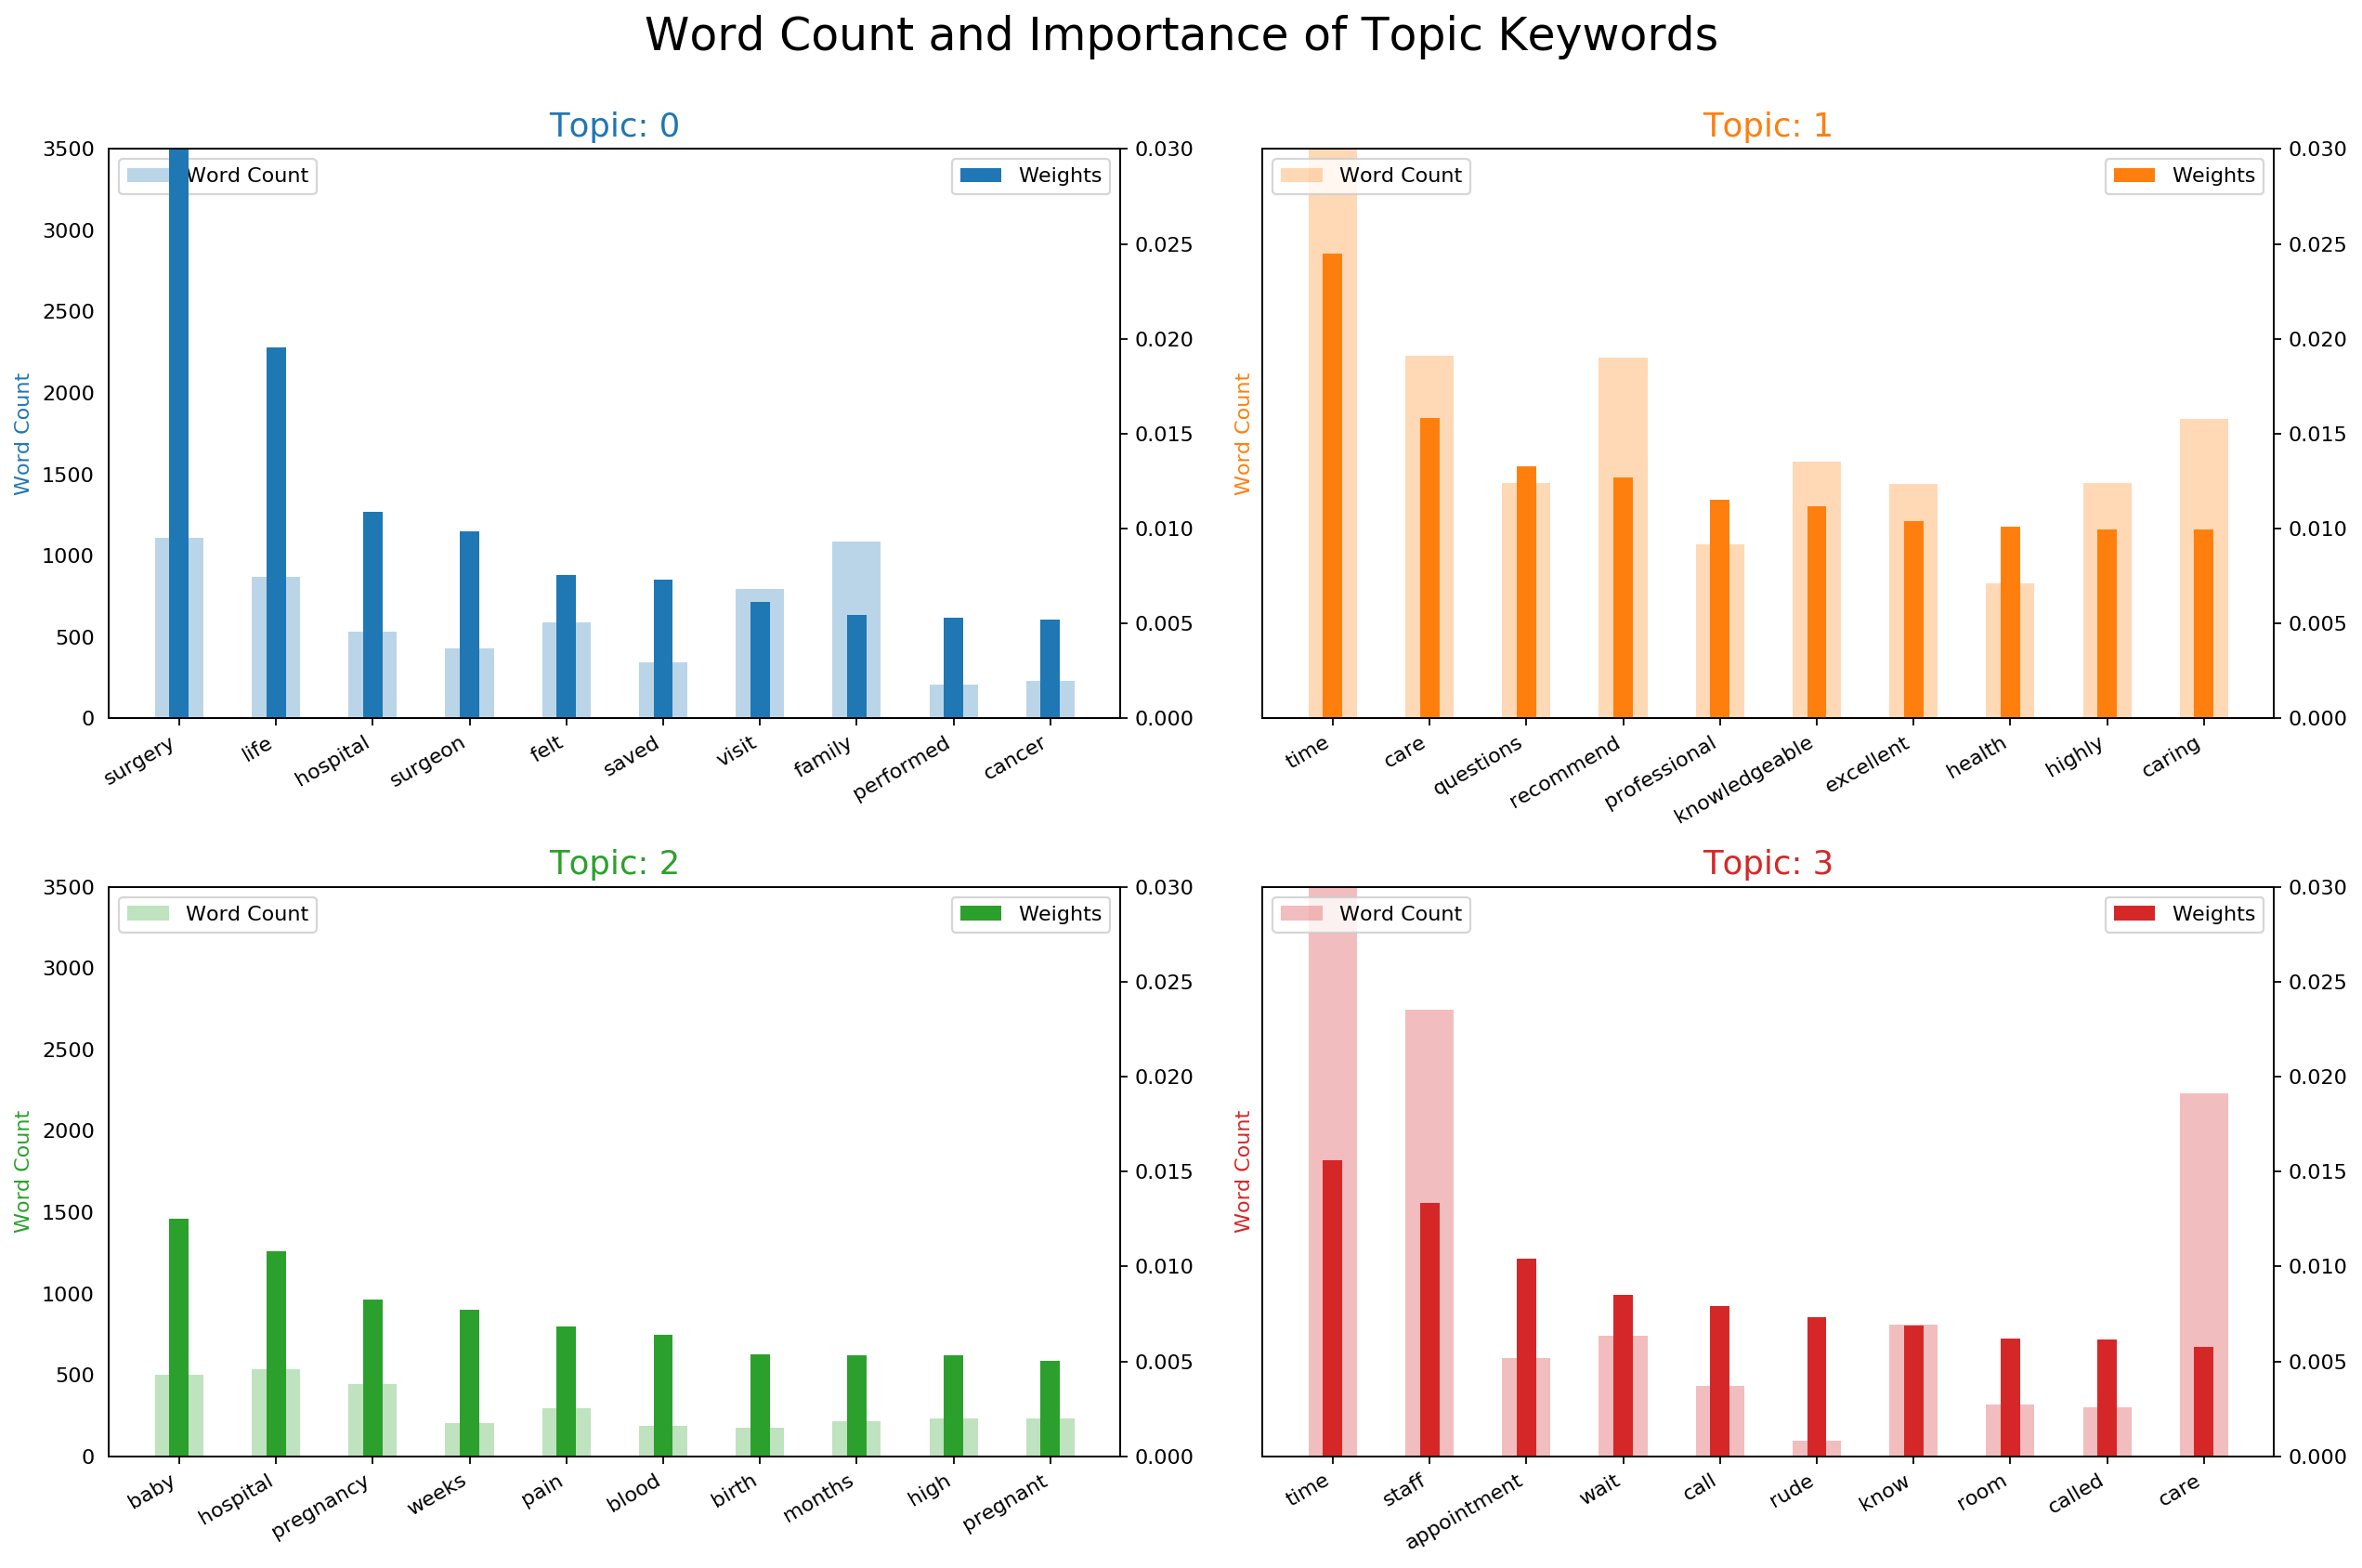

In [33]:
topics = ldamodel_all.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_all for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_all, doc_term_matrix_all, dictionary=ldamodel_all.id2word)
vis

## Topic Analysis for Good Reviews

In [0]:
# Topic Analysis for good reviews
rvws_g = stopText(reviews_good)
clean_rvws_g = [i.split() for i in rvws_g]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_g = corpora.Dictionary(clean_rvws_g)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_g = [dictionary_g.doc2bow(doc) for doc in clean_rvws_g]

In [41]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix for good reviews
ldamodel_g = Lda(doc_term_matrix_g, num_topics=5, id2word = dictionary_g, passes=50)

#Results
print(ldamodel_g.print_topics(num_topics=5, num_words=7))

[(0, '0.037*"time" + 0.021*"feel" + 0.020*"questions" + 0.018*"best" + 0.014*"care" + 0.013*"caring" + 0.013*"recommend"'), (1, '0.042*"staff" + 0.020*"great" + 0.019*"friendly" + 0.017*"professional" + 0.017*"helpful" + 0.016*"recommend" + 0.015*"care"'), (2, '0.034*"surgery" + 0.012*"life" + 0.012*"surgeon" + 0.009*"hospital" + 0.008*"procedure" + 0.007*"pain" + 0.007*"thank"'), (3, '0.023*"great" + 0.017*"bedside" + 0.016*"manner" + 0.012*"recommend" + 0.011*"kind" + 0.010*"wonderful" + 0.010*"staff"'), (4, '0.016*"time" + 0.012*"wait" + 0.008*"best" + 0.008*"know" + 0.008*"visit" + 0.008*"care" + 0.008*"love"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'time'),
 Text(0, 0, 'feel'),
 Text(0, 0, 'questions'),
 Text(0, 0, 'best'),
 Text(0, 0, 'care'),
 Text(0, 0, 'caring'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'concerns'),
 Text(0, 0, 'health'),
 Text(0, 0, 'makes')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'staff'),
 Text(0, 0, 'great'),
 Text(0, 0, 'friendly'),
 Text(0, 0, 'professional'),
 Text(0, 0, 'helpful'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'care'),
 Text(0, 0, 'knowledgeable'),
 Text(0, 0, 'caring'),
 Text(0, 0, 'nice')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'surgery'),
 Text(0, 0, 'life'),
 Text(0, 0, 'surgeon'),
 Text(0, 0, 'hospital'),
 Text(0, 0, 'procedure'),
 Text(0, 0, 'pain'),
 Text(0, 0, 'thank'),
 Text(0, 0, 'delivered'),
 Text(0, 0, 'god'),
 Text(0, 0, 'best')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'great'),
 Text(0, 0, 'bedside'),
 Text(0, 0, 'manner'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'kind'),
 Text(0, 0, 'wonderful'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'caring'),
 Text(0, 0, 'knowledgeable'),
 Text(0, 0, 'highly')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

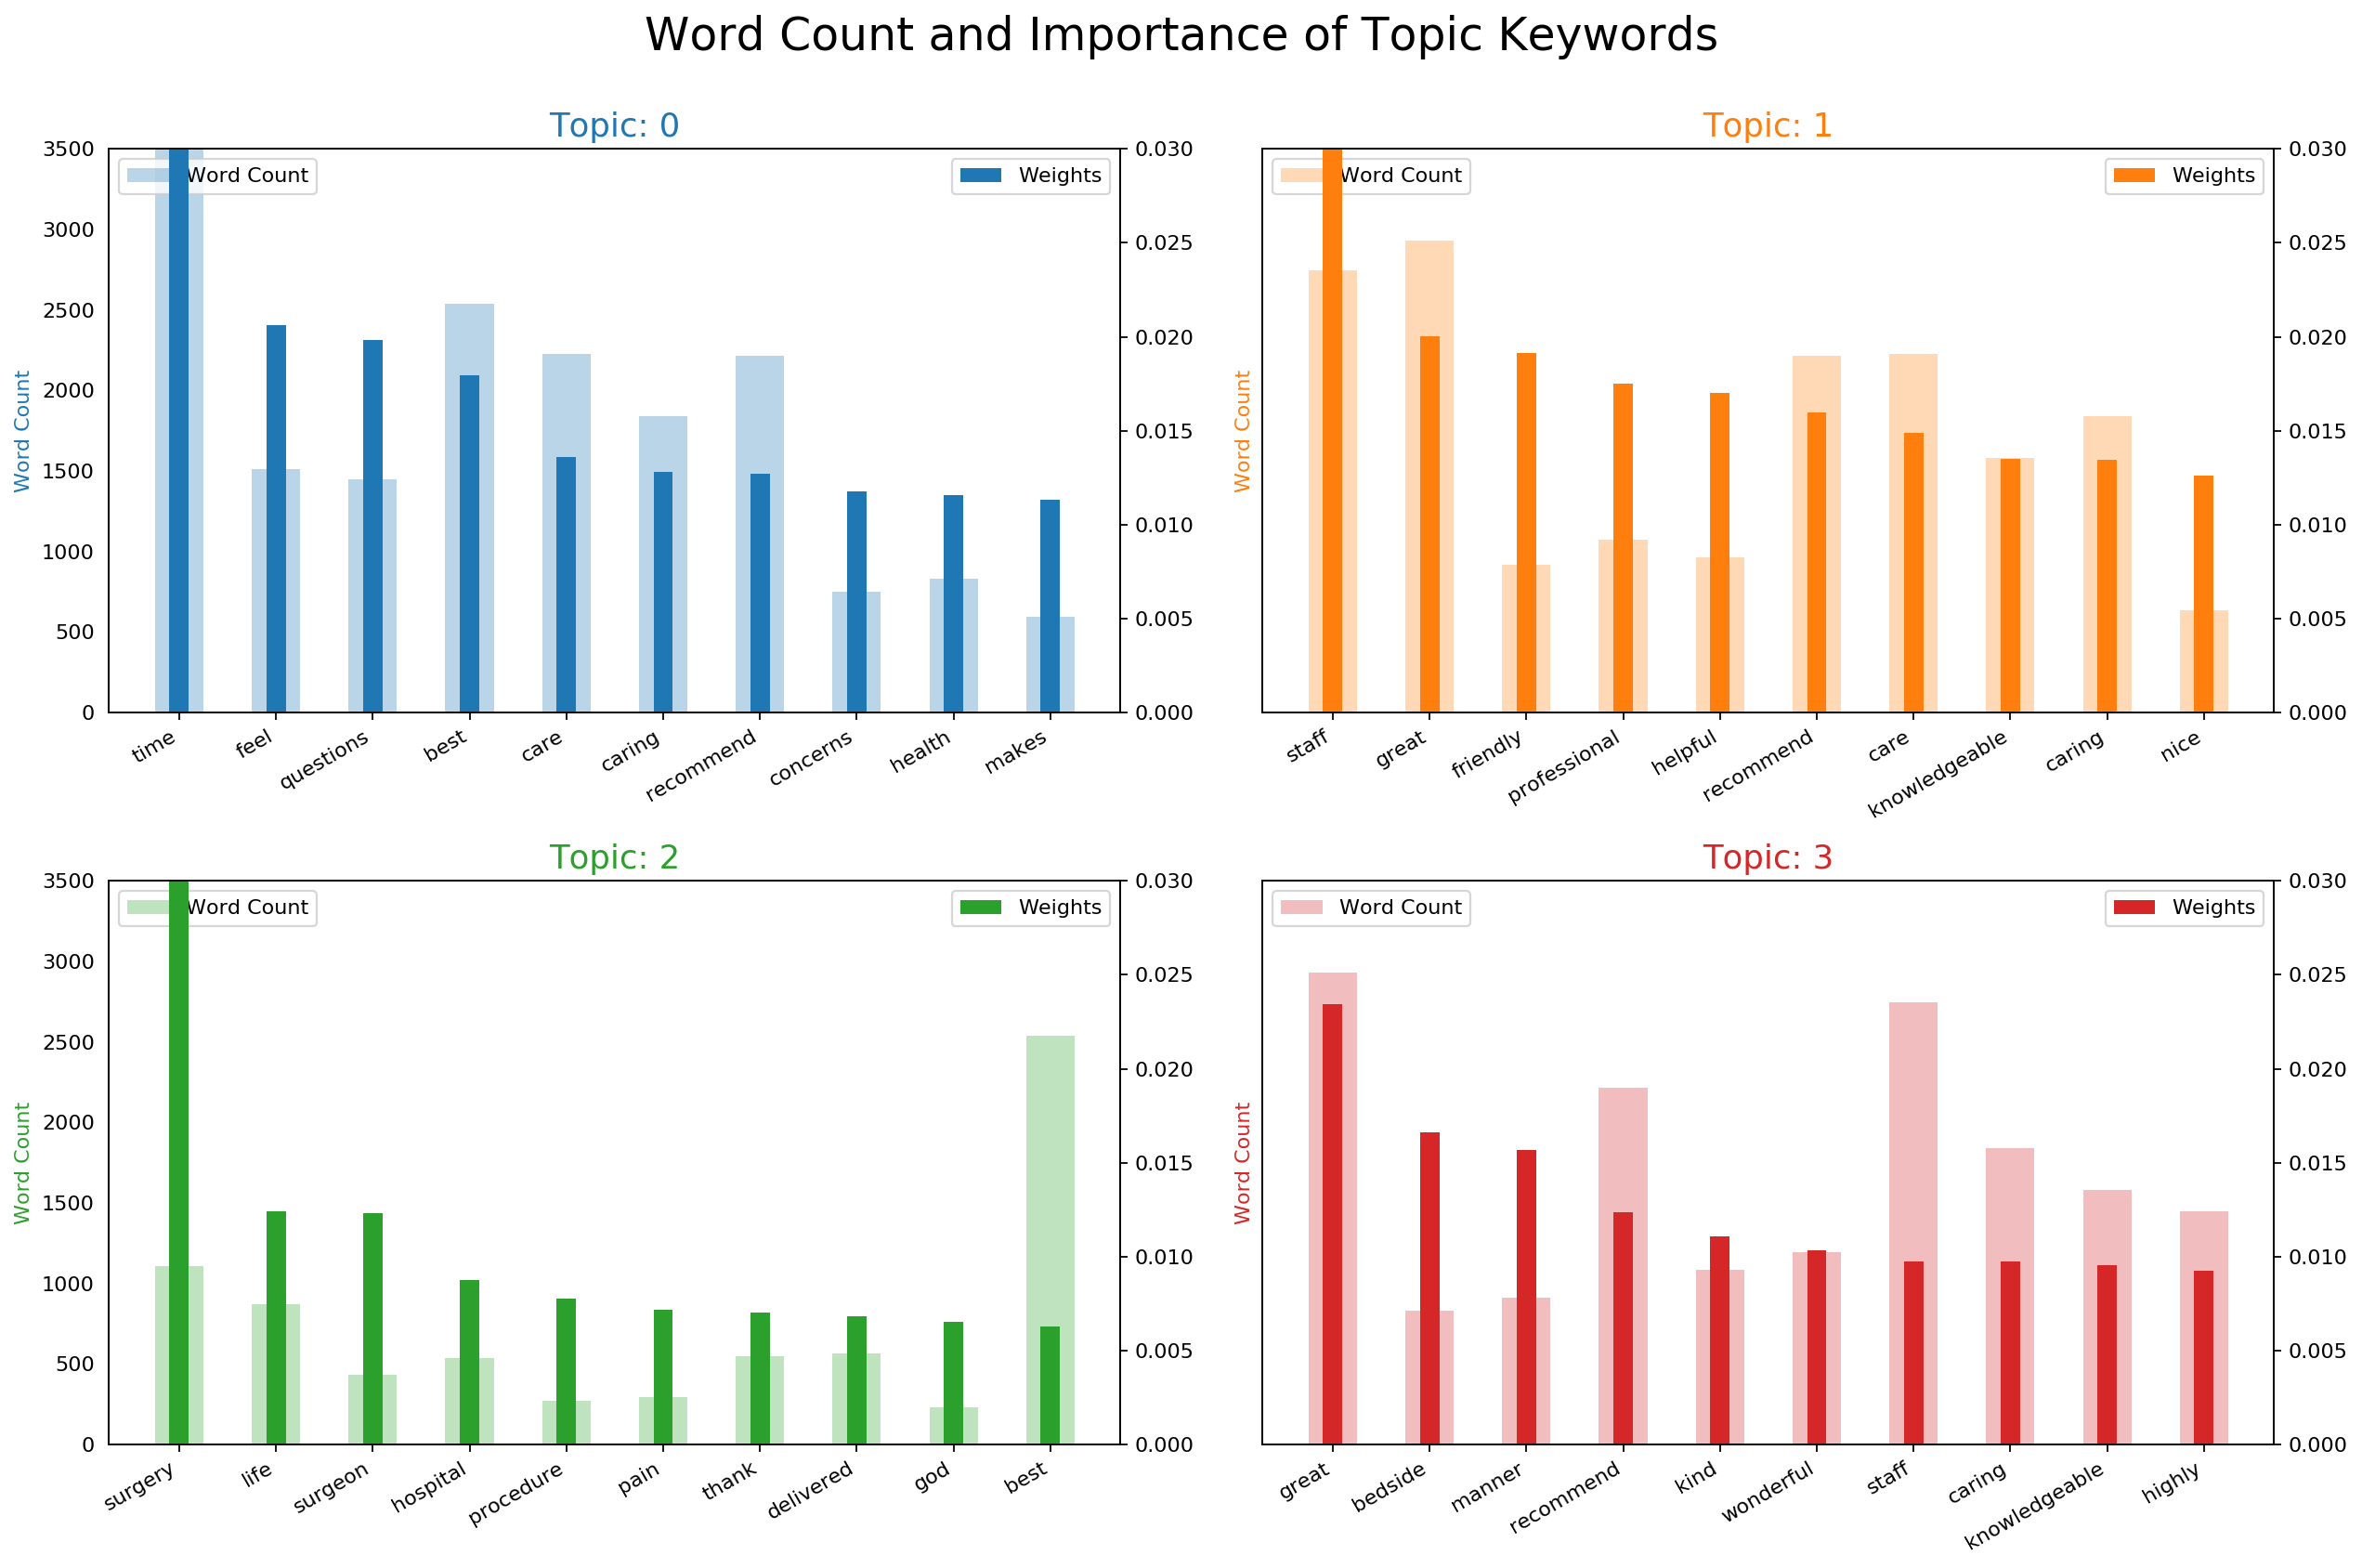

In [42]:
topics = ldamodel_g.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_g for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_g, doc_term_matrix_g, dictionary=ldamodel_g.id2word)
vis

## Topic Analysis for Bad Reviews

In [0]:
# Topic Analysis for good reviews
rvws_b = stopText(reviews_bad)
clean_rvws_b = [i.split() for i in rvws_b]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_b = corpora.Dictionary(clean_rvws_b)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_b = [dictionary_b.doc2bow(doc) for doc in clean_rvws_b]

In [44]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix for good reviews
ldamodel_b = Lda(doc_term_matrix_b, num_topics=5, id2word = dictionary_b, passes=50)

#Results
print(ldamodel_b.print_topics(num_topics=5, num_words=7))

[(0, '0.012*"pain" + 0.010*"surgery" + 0.007*"medication" + 0.006*"blood" + 0.006*"hospital" + 0.005*"help" + 0.005*"care"'), (1, '0.009*"baby" + 0.006*"time" + 0.006*"called" + 0.006*"away" + 0.005*"test" + 0.005*"csection" + 0.005*"later"'), (2, '0.012*"rude" + 0.010*"experience" + 0.009*"questions" + 0.009*"time" + 0.008*"care" + 0.008*"worst" + 0.008*"manner"'), (3, '0.013*"time" + 0.010*"staff" + 0.010*"surgery" + 0.006*"appointment" + 0.006*"wait" + 0.005*"ultrasound" + 0.004*"recommend"'), (4, '0.023*"staff" + 0.018*"time" + 0.017*"appointment" + 0.013*"call" + 0.010*"called" + 0.010*"wait" + 0.008*"results"')]


<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'pain'),
 Text(0, 0, 'surgery'),
 Text(0, 0, 'medication'),
 Text(0, 0, 'blood'),
 Text(0, 0, 'hospital'),
 Text(0, 0, 'help'),
 Text(0, 0, 'care'),
 Text(0, 0, 'needed'),
 Text(0, 0, 'er'),
 Text(0, 0, 'daughter')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'baby'),
 Text(0, 0, 'time'),
 Text(0, 0, 'called'),
 Text(0, 0, 'away'),
 Text(0, 0, 'test'),
 Text(0, 0, 'csection'),
 Text(0, 0, 'later'),
 Text(0, 0, 'weeks'),
 Text(0, 0, 'pregnant'),
 Text(0, 0, 'results')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'rude'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'questions'),
 Text(0, 0, 'time'),
 Text(0, 0, 'care'),
 Text(0, 0, 'worst'),
 Text(0, 0, 'manner'),
 Text(0, 0, 'bedside'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'horrible')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'time'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'surgery'),
 Text(0, 0, 'appointment'),
 Text(0, 0, 'wait'),
 Text(0, 0, 'ultrasound'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'room'),
 Text(0, 0, 'find'),
 Text(0, 0, 'call')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

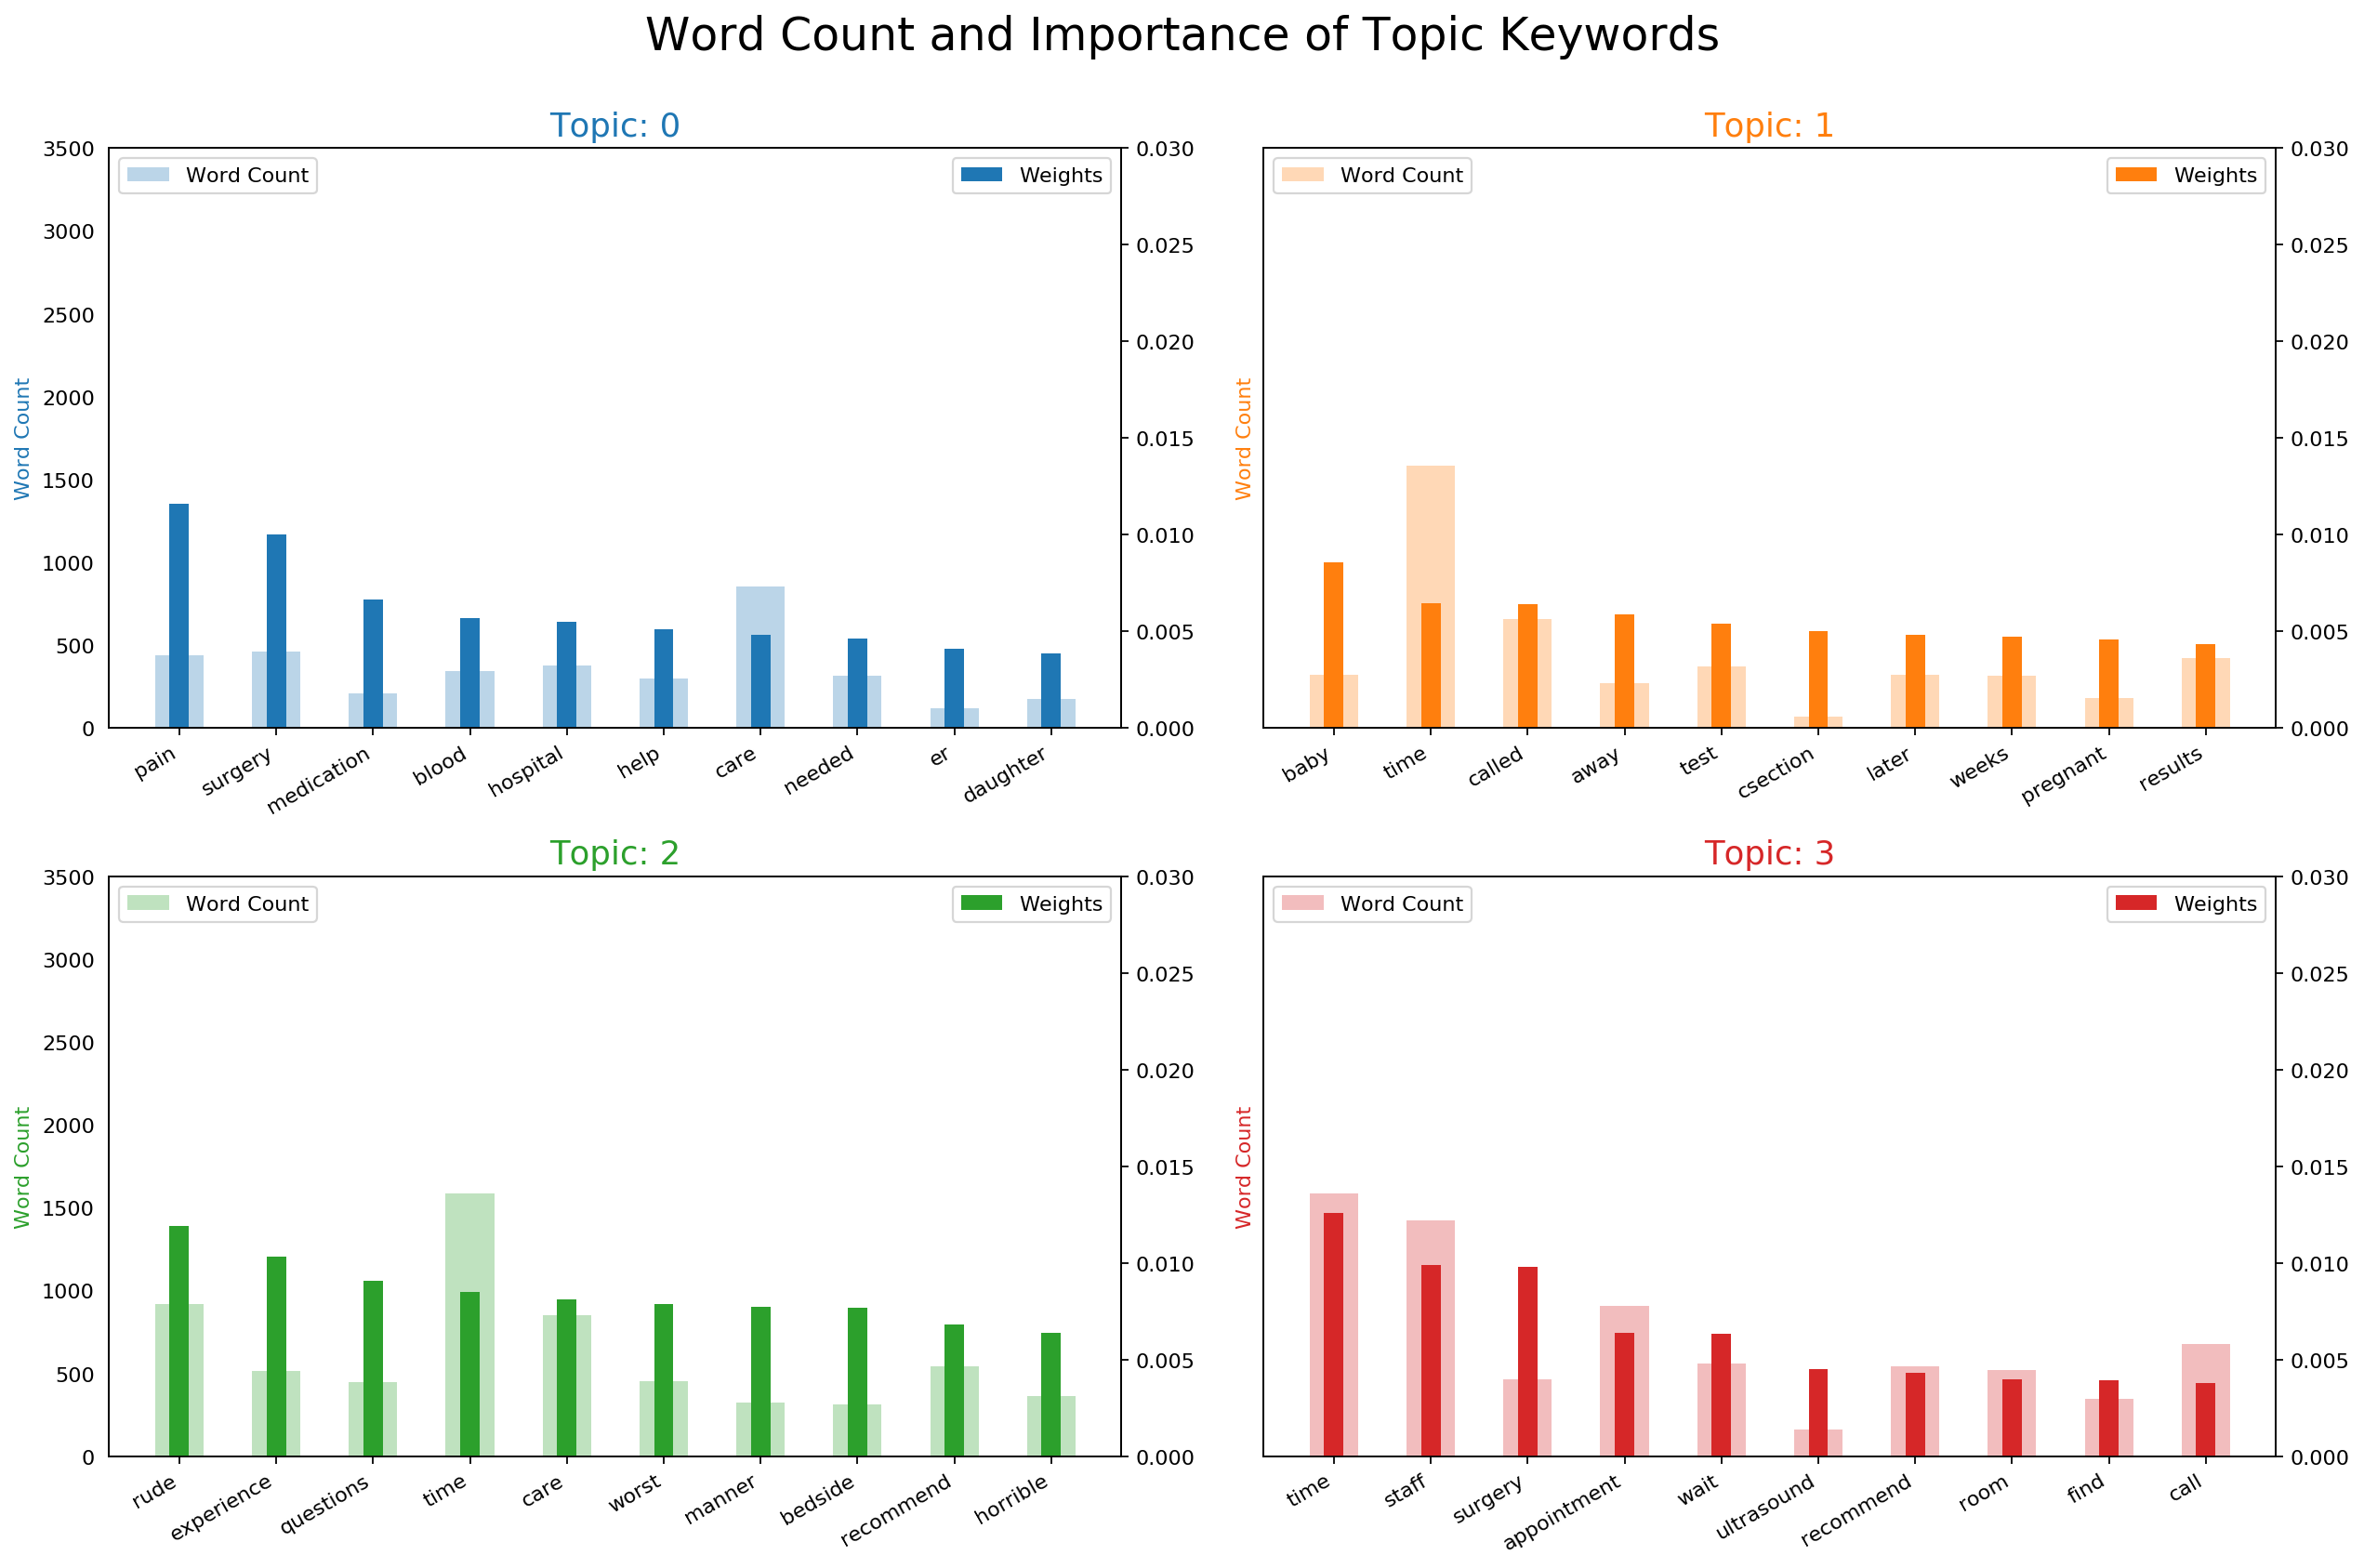

In [45]:
topics = ldamodel_b.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_b for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [49]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_b, doc_term_matrix_b, dictionary=ldamodel_b.id2word)
vis

KeyboardInterrupt: ignored

# Analysis Based on Each of the Six Specialties

### General Practitioners

In [24]:
# Clean Null Values
df_gp = df_gp[df_gp.review.notnull()]
df_gp = df_gp[df_gp.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_gp = df_gp[['individual_rating', 'review']]
df_gp.individual_rating = df_gp.individual_rating.astype(float)
df_gp = df_gp[(df_gp.individual_rating >= 4) | (df_gp.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_gp['is_good'] = (df_gp.individual_rating >= 4) * 1 + (df_gp.individual_rating < 3) * 0


gp_sub = df_gp.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_gp = vec.fit_transform(gp_sub)
dtm_gp = pd.DataFrame(X_gp.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_gp = dtm_gp.T
print(tdm_gp.shape)

(3756, 2836)


### Calculate Fisher's Discriminant Score

In [25]:
mask_gp = pd.DataFrame(df_gp.is_good)
good_df_gp = dtm.iloc[np.any(mask_gp.values,axis=1),]
bad_df_gp = dtm.iloc[~np.any(mask_gp.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df) + len(good_df))/len(dtm)

1.0

In [26]:
FiDi_gp = pd.DataFrame(((good_df_gp.mean() - bad_df_gp.mean())**2)/(np.std(good_df_gp)**2 + np.std(bad_df_gp)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_gp = FiDi_gp.term.tolist()
words_gp = stopText(words_gp)
words_gp = stopOther(words_gp)

words_gp = pd.Series(words_gp).str.lstrip(" ").tolist()

FiDi_gp = FiDi_gp[FiDi_gp.term.isin(words_gp)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_gp.head(25)

,term,FiDi_score
7478,his_staff_is,0.008347
16013,to_understand,0.008304
4142,doctor_with,0.007792
7551,hospital_and,0.007090
7199,her_that,0.006963
1932,asked_her,0.006777
708,an_hour,0.006757
12113,questions_and_concerns,0.006712
852,and_concerns,0.006526
9073,listen_to_my,0.006517


### Create DF of most Frequent Words

In [27]:
tdm_gp['total'] = tdm_gp.sum(axis =1)
freq_gp = tdm_gp.reset_index().rename(columns = {"level_0":"allwords"})

words2_gp = freq_gp.allwords.tolist()
words2_gp = stopText(words2_gp)
words2_gp = stopOther(words2_gp)

words2_gp = pd.Series(words2_gp).str.lstrip(" ").tolist()

freq_gp = freq_gp[freq_gp.allwords.isin(words2_gp)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_gp.head(25)

,allwords,total
3089,time,924
2769,staff,701
571,care,541
1182,great,499
965,family,408
2455,recommend,396
1170,good,372
481,best,364
593,caring,329
316,appointment,325


### Most frequent phrases

In [29]:
freq_gp['under_count'] = freq_gp.allwords.str.count('_')
freq_gp[freq_gp.under_count>=3].head(25)

,allwords,total,under_count
2841,takes_the_time_to,65,3
2238,one_of_the_best,52,3
3103,time_to_listen_to,38,3
1642,is_the_best_doctor,34,3
1256,have_been_going_to,33,3
3002,the_time_to_listen,33,3
454,been_going_to_dr,31,3
589,cares_about_his_patients,31,3
1260,have_been_patient_of,29,3
1553,in_the_waiting_room,25,3


## Cardiology

In [0]:
# Clean Null Values
df_cardio = df_cardio[df_cardio.review.notnull()]
df_cardio = df_cardio[df_cardio.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_cardio = df_cardio[['individual_rating', 'review']]
df_cardio.individual_rating = df_cardio.individual_rating.astype(float)
df_cardio = df_cardio[(df_cardio.individual_rating >= 4) | (df_cardio.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_cardio['is_good'] = (df_cardio.individual_rating >= 4) * 1 + (df_cardio.individual_rating < 3) * 0


cardio_sub = df_cardio.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_cardio = vec.fit_transform(cardio_sub)
dtm_cardio = pd.DataFrame(X_cardio.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_cardio = dtm_cardio.T
print(tdm_cardio.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_cardio = pd.DataFrame(df_cardio.is_good)
good_df_cardio = dtm.iloc[np.any(mask_cardio.values,axis=1),]
bad_df_cardio = dtm.iloc[~np.any(mask_cardio.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_cardio) + len(good_df_cardio))/len(dtm_cardio)

In [0]:
FiDi_cardio = pd.DataFrame(((good_df_cardio.mean() - bad_df_cardio.mean())**2)/(np.std(good_df_cardio)**2 + np.std(bad_df_cardio)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_cardio = FiDi_cardio.term.tolist()
words_cardio = stopText(words_cardio)
words_cardio = stopOther(words_cardio)

words_cardio = pd.Series(words_cardio).str.lstrip(" ").tolist()

FiDi_cardio = FiDi_cardio[FiDi_cardio.term.isin(words_cardio)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_cardio.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_cardio['total'] = tdm_cardio.sum(axis =1)
freq_cardio = tdm_cardio.reset_index().rename(columns = {"level_0":"allwords"})

words2_cardio = freq_cardio.allwords.tolist()
words2_cardio = stopText(words2_cardio)
words2_cardio = stopOther(words2_cardio)

words2_cardio = pd.Series(words2_cardio).str.lstrip(" ").tolist()

freq_cardio = freq_cardio[freq_cardio.allwords.isin(words2_cardio)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_cardio.head(25)

### Most frequent phrases

In [0]:
freq_cardio['under_count'] = freq_cardio.allwords.str.count('_')
freq_cardio[freq_cardio.under_count>=3].head(25)

## Internal Medicine

In [0]:
# Clean Null Values
df_intern = df_intern[df_intern.review.notnull()]
df_intern = df_intern[df_intern.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_intern = df_intern[['individual_rating', 'review']]
df_intern.individual_rating = df_intern.individual_rating.astype(float)
df_intern = df_intern[(df_intern.individual_rating >= 4) | (df_intern.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_intern['is_good'] = (df_intern.individual_rating >= 4) * 1 + (df_intern.individual_rating < 3) * 0


intern_sub = df_intern.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_intern = vec.fit_transform(intern_sub)
dtm_intern = pd.DataFrame(X_intern.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_intern = dtm_intern.T
print(tdm_intern.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_intern = pd.DataFrame(df_intern.is_good)
good_df_intern = dtm.iloc[np.any(mask_intern.values,axis=1),]
bad_df_intern = dtm.iloc[~np.any(mask_intern.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_intern) + len(good_df_intern))/len(dtm_intern)

In [0]:
FiDi_intern = pd.DataFrame(((good_df_intern.mean() - bad_df_intern.mean())**2)/(np.std(good_df_intern)**2 + np.std(bad_df_intern)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_intern = FiDi_intern.term.tolist()
words_intern = stopText(words_intern)
words_intern = stopOther(words_intern)

words_intern = pd.Series(words_intern).str.lstrip(" ").tolist()

FiDi_intern = FiDi_intern[FiDi_intern.term.isin(words_intern)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_intern.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_intern['total'] = tdm_intern.sum(axis =1)
freq_intern = tdm_intern.reset_index().rename(columns = {"level_0":"allwords"})

words2_intern = freq_intern.allwords.tolist()
words2_intern = stopText(words2_intern)
words2_intern = stopOther(words2_intern)

words2_intern = pd.Series(words2_intern).str.lstrip(" ").tolist()

freq_intern = freq_intern[freq_intern.allwords.isin(words2_intern)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_intern.head(25)

### Most frequent phrases

In [0]:
freq_intern['under_count'] = freq_intern.allwords.str.count('_')
freq_intern[freq_intern.under_count>=3].head(25)

## Paediatrics

In [0]:
# Clean Null Values
df_ped = df_ped[df_ped.review.notnull()]
df_ped = df_ped[df_ped.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_ped = df_ped[['individual_rating', 'review']]
df_ped.individual_rating = df_ped.individual_rating.astype(float)
df_ped = df_ped[(df_ped.individual_rating >= 4) | (df_ped.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_ped['is_good'] = (df_ped.individual_rating >= 4) * 1 + (df_ped.individual_rating < 3) * 0


ped_sub = df_ped.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_ped = vec.fit_transform(ped_sub)
dtm_ped = pd.DataFrame(X_ped.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_ped = dtm_ped.T
print(tdm_ped.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_ped = pd.DataFrame(df_ped.is_good)
good_df_ped = dtm.iloc[np.any(mask_ped.values,axis=1),]
bad_df_ped = dtm.iloc[~np.any(mask_ped.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_ped) + len(good_df_ped))/len(dtm_ped)

In [0]:
FiDi_ped = pd.DataFrame(((good_df_ped.mean() - bad_df_ped.mean())**2)/(np.std(good_df_ped)**2 + np.std(bad_df_ped)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_ped = FiDi_ped.term.tolist()
words_ped = stopText(words_ped)
words_ped = stopOther(words_ped)

words_ped = pd.Series(words_ped).str.lstrip(" ").tolist()

FiDi_ped = FiDi_ped[FiDi_ped.term.isin(words_ped)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_ped.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_ped['total'] = tdm_ped.sum(axis =1)
freq_ped = tdm_ped.reset_index().rename(columns = {"level_0":"allwords"})

words2_ped = freq_ped.allwords.tolist()
words2_ped = stopText(words2_ped)
words2_ped = stopOther(words2_ped)

words2_ped = pd.Series(words2_ped).str.lstrip(" ").tolist()

freq_ped = freq_ped[freq_ped.allwords.isin(words2_ped)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_ped.head(25)

### Most frequent phrases

In [0]:
freq_ped['under_count'] = freq_ped.allwords.str.count('_')
freq_ped[freq_ped.under_count>=3].head(25)

## General Surgery

In [0]:
# Clean Null Values
df_surg = df_surg[df_surg.review.notnull()]
df_surg = df_surg[df_surg.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_surg = df_surg[['individual_rating', 'review']]
df_surg.individual_rating = df_surg.individual_rating.astype(float)
df_surg = df_surg[(df_surg.individual_rating >= 4) | (df_surg.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_surg['is_good'] = (df_surg.individual_rating >= 4) * 1 + (df_surg.individual_rating < 3) * 0


surg_sub = df_surg.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_surg = vec.fit_transform(surg_sub)
dtm_surg = pd.DataFrame(X_surg.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_surg = dtm_surg.T
print(tdm_surg.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_surg = pd.DataFrame(df_surg.is_good)
good_df_surg = dtm.iloc[np.any(mask_surg.values,axis=1),]
bad_df_surg = dtm.iloc[~np.any(mask_surg.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_surg) + len(good_df_surg))/len(dtm_surg)

In [0]:
FiDi_surg = pd.DataFrame(((good_df_surg.mean() - bad_df_surg.mean())**2)/(np.std(good_df_surg)**2 + np.std(bad_df_surg)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_surg = FiDi_surg.term.tolist()
words_surg = stopText(words_surg)
words_surg = stopOther(words_surg)

words_surg = pd.Series(words_surg).str.lstrip(" ").tolist()

FiDi_surg = FiDi_surg[FiDi_surg.term.isin(words_surg)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_surg.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_surg['total'] = tdm_surg.sum(axis =1)
freq_surg = tdm_surg.reset_index().rename(columns = {"level_0":"allwords"})

words2_surg = freq_surg.allwords.tolist()
words2_surg = stopText(words2_surg)
words2_surg = stopOther(words2_surg)

words2_surg = pd.Series(words2_surg).str.lstrip(" ").tolist()

freq_surg = freq_surg[freq_surg.allwords.isin(words2_surg)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_surg.head(25)

### Most frequent phrases

In [0]:
freq_surg['under_count'] = freq_surg.allwords.str.count('_')
freq_surg[freq_surg.under_count>=3].head(25)

## OBGYN

In [0]:
# Clean Null Values
df_ob = df_ob[df_ob.review.notnull()]
df_ob = df_ob[df_ob.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_ob = df_ob[['individual_rating', 'review']]
df_ob.individual_rating = df_ob.individual_rating.astype(float)
df_ob = df_ob[(df_ob.individual_rating >= 4) | (df_ob.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_ob['is_good'] = (df_ob.individual_rating >= 4) * 1 + (df_ob.individual_rating < 3) * 0


ob_sub = df_ob.review.str.lower()
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_ob = vec.fit_transform(ob_sub)
dtm_ob = pd.DataFrame(X_ob.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_ob = dtm_ob.T
print(tdm_ob.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_ob = pd.DataFrame(df_ob.is_good)
good_df_ob = dtm.iloc[np.any(mask_ob.values,axis=1),]
bad_df_ob = dtm.iloc[~np.any(mask_ob.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_ob) + len(good_df_ob))/len(dtm_ob)

In [0]:
FiDi_ob = pd.DataFrame(((good_df_ob.mean() - bad_df_ob.mean())**2)/(np.std(good_df_ob)**2 + np.std(bad_df_ob)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_ob = FiDi_ob.term.tolist()
words_ob = stopText(words_ob)
words_ob = stopOther(words_ob)

words_ob = pd.Series(words_ob).str.lstrip(" ").tolist()

FiDi_ob = FiDi_ob[FiDi_ob.term.isin(words_ob)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_ob.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_ob['total'] = tdm_ob.sum(axis =1)
freq_ob = tdm_ob.reset_index().rename(columns = {"level_0":"allwords"})

words2_ob = freq_ob.allwords.tolist()
words2_ob = stopText(words2_ob)
words2_ob = stopOther(words2_ob)

words2_ob = pd.Series(words2_ob).str.lstrip(" ").tolist()

freq_ob = freq_surg[freq_ob.allwords.isin(words2_ob)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_ob.head(25)

### Most frequent phrases

In [0]:
freq_ob['under_count'] = freq_ob.allwords.str.count('_')
freq_ob[freq_ob.under_count>=3].head(25)